# Desafío 3 - Grupo 7

## Integrantes:

- Bobbio, Paula
- Sammartino, Virginia
- Cocio, Alex Federico
- Onno, Olivier

## Lectura del dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../Data/Aprender2018-primaria-6.csv', sep=';')

C:\Users\alexc\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. 

Fuente: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [3]:
data.sample(5)

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
29964,3,1,1,1,1,4,1,2,2,2,...,"1,1597569","1,2943739",4,"670,94391","1,229282",3,"537,5163",2,2,2
508805,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,"1,0440694",,,,,,,-1,-1,-1
548074,2,1,1,1,1,4,1,1,-9,1,...,"1,2941245","1,2217257",3,"510,23138","1,3743259",1,"376,95645",2,2,2
514605,3,2,1,1,1,5,1,-9,-9,-9,...,"1,1408101","1,198115",4,"571,47937","1,2583444",2,"408,00464",1,1,1
184868,-9,-9,-9,1,-9,7,1,-9,-9,-9,...,"3,5976689",,,,,,,-1,-1,-1


## Feature Selection

Descartamos manualmente las variables que consideramos redundantes para el problema. Estas son:
- Indice del Contexto Social de la Educación
- Factor de expansión (solo para variable cuestionario complementario)
- Factor de expansión prueba de Lengua
- Puntaje en Lengua
- Factor de expansión prueba de Matemática
- Puntaje en Matemática
- Indice socioeconómico del alumno
- Indice socioeconómico del alumno ponderador Lengua
- Indice socioeconómico del alumno ponderador Matemática

- Desempeño en Lengua


In [4]:
columns_to_drop = ['ICSE','ponder','lpondera','lpuntaje','mpondera','mpuntaje','isocioa','isocioal','isocioam', 'ldesemp']
data1 = data.drop(columns_to_drop, axis=1)
print('Eliminamos', data.shape[1]-data1.shape[1], 'columnas.')

Eliminamos 10 columnas.


# Analizamos algunas características del dataset

In [5]:
# ¿Cuántas observaciones hay en la tabla?
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579510 entries, 0 to 579509
Columns: 114 entries, ap1 to mdesemp
dtypes: int64(113), object(1)
memory usage: 504.0+ MB


In [6]:
# Dimensión del dataframe
print('El dataset tiene', data1.shape[0], 'filas y', data1.shape[1], 'columnas.') 

El dataset tiene 579510 filas y 114 columnas.


In [7]:
# ¿Qué tipo de datos tiene?
data1.dtypes.value_counts()

int64     113
object      1
dtype: int64

In [8]:
# ¿Hay datos faltantes?
print('Datos faltantes:', data1.isnull().any(axis=1).sum())

Datos faltantes: 0


In [9]:
# ¿Están balanceados los datos de la variable target?
data1.mdesemp.value_counts(normalize=True, ascending=False).round(2)

3    0.37
2    0.21
4    0.20
1    0.18
     0.05
Name: mdesemp, dtype: float64

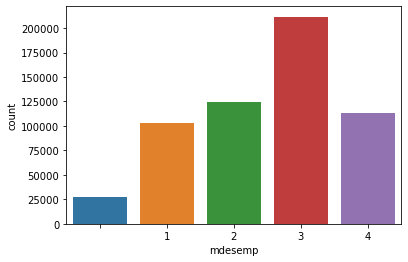

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data1.mdesemp.sort_values(), label="Count")
plt.show()

## Algunas consideraciones

1) Elimino las filas que no especifica ningún valor en la columna target

In [11]:
empty_mask = data1.mdesemp == ' '
data1.loc[empty_mask,:]

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ap39,ap40,ap41a,ap41b,ap41c,ap42,cod_provincia,sector,ambito,mdesemp
11,3,1,1,1,1,3,2,2,-9,-9,...,-1,-1,1,1,-9,-1,6,1,1,
45,2,1,1,1,1,7,1,2,2,2,...,-1,-1,2,2,-9,-1,6,1,1,
61,2,1,1,2,2,4,1,1,-9,1,...,-1,-1,2,2,1,-1,6,1,1,
62,3,1,1,1,1,4,1,1,2,1,...,-1,-1,2,3,1,-1,6,1,1,
63,2,1,1,1,1,6,1,2,2,1,...,-1,-1,-9,-9,-9,-1,6,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579431,2,2,1,1,1,3,1,1,2,1,...,-1,-1,2,3,1,-1,94,1,1,
579432,2,2,1,1,1,3,1,2,2,2,...,-1,-1,2,4,2,-1,94,1,1,
579483,3,2,1,1,1,5,1,1,2,2,...,-1,-1,1,-9,-6,-1,94,1,1,
579493,2,2,8,8,8,4,1,1,-9,-9,...,-1,-1,-9,-9,-9,-1,94,1,1,


In [12]:
indexNames = data1[empty_mask].index
data2 = data1.drop(indexNames)

3    0.38
2    0.23
4    0.21
1    0.19
Name: mdesemp, dtype: float64


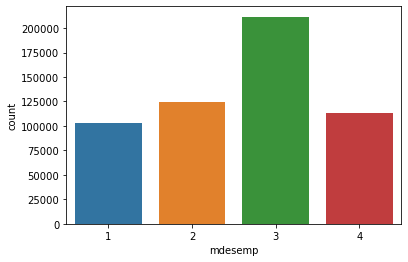

In [13]:
print(data2.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data2.mdesemp.sort_values(), label="Count")
plt.show()

2) Creamos una muestra para agilizar el tiempo computacional

In [36]:
data2_sample = data2.sample(frac=0.005, random_state=2)
print('Vamos a trabajar con una muestra del', round(data2_sample.shape[0]/data2.shape[0],4)*100,'% del dataset.')

Vamos a trabajar con una muestra del 0.5 % del dataset.


In [15]:
data2_sample.shape

(2760, 114)

3    0.39
2    0.22
4    0.21
1    0.18
Name: mdesemp, dtype: float64


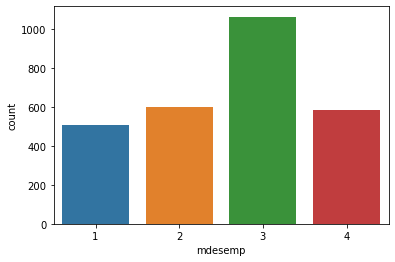

In [16]:
print(data2_sample.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data2_sample.mdesemp.sort_values(), label="Count")
plt.show()

Renombramos algunas columnas para facilitar la interpretación del dataset

In [17]:
data2_sample = data2_sample.rename(columns={'ap1': 'edad', 'ap2':'sexo', 'ap4':'personasconv', 'ap7a':'internet' ,
                            'ap7b':'agua', 'ap7c':'compu', 'ap9':'educmam', 'ap14':'trabajofam', 'ap15':'trabajofuera',
                            'ap16':'jardin' , 'ap17':'repetidor', 'ap22':'opmat'})

### Preprocesamiento de datos

Armamos la matriz de predictores ($X$) (vamos a seleccionar sólo algunas columnas) y el target ($y$) (que es el nivel de desempeño en Matemática)

In [18]:
cols=['edad', 'sexo', 'personasconv', 'internet', 'agua', 'compu', 'educmam', 'trabajofam', 'trabajofuera', 'jardin', 'repetidor', 'opmat']
X = data2_sample[cols]
y = data2_sample['mdesemp']

¿Hace falta estandarizar en este caso? Los features están en las mismas unidades pero las escalas podrían ser distintas

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
def estandarizar_feature(a):
    onehot_encoder = OneHotEncoder(drop='first')
    # fiteo y transformo la columna "nombre_de_feature"
    dummy_oneHot_correct = onehot_encoder.fit_transform(data2_sample[[a]])
    #pongo un vector en un dataset
    dummy_oneHot_correct = pd.DataFrame(dummy_oneHot_correct.toarray())

    return

In [21]:
estandarizar_feature('edad')
estandarizar_feature('sexo')
estandarizar_feature('personasconv')
estandarizar_feature('internet')
estandarizar_feature('agua')
estandarizar_feature('compu')
estandarizar_feature('educmam')
estandarizar_feature('trabajofam')
estandarizar_feature('trabajofuera')
estandarizar_feature('jardin')
estandarizar_feature('repetidor')
estandarizar_feature('opmat')

Como la codificación **"One-Hot-Enconding" induce una multicolinealidad perfecta**, eliminamos una de las columnas de las características codificadas

Utilizaremos la variable "mdesemp" para generar una variable derivada que tenga en cuenta que es mejor si el desempeño es "satsifactorio". Con esto podemos generar por ejemplo una variable categórica que puede ser utilizada como vector "objetivo" en un problema de clasificación.

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(data2_sample['mdesemp'])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1932, 12)

(828, 12)

(1932,)

(828,)

### Naive - Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [26]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(X_test)
y_pred

array([3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 1, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       1, 0, 0, 2, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 0, 3, 2, 3, 1, 3, 1, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3,
       0, 1, 3, 0, 2, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 1, 1, 3, 0, 1, 3, 3, 1, 2, 3, 0, 3,

In [28]:
round(accuracy_score(y_test, y_pred), 2)

0.26

In [29]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[ 38  25   9  81]
 [ 23  21   9 127]
 [ 42  26   7 244]
 [ 12   9   5 150]]


## GridSearch

### K - Nearest Neighbours y Logistic Regression

Comenzamos importando el método de sklearn

In [30]:
from sklearn.model_selection import GridSearchCV

Instanciamos los estimadores/modelos

In [31]:
models = [LogisticRegression(),
          KNeighborsClassifier()]

Definimos la grilla de parámetros que queremos testear

In [32]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,200),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]}
]

Definimos la cantidad de folds

In [37]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

Instanciamos el método GridSearchCV eligiendo accuracy como medida de scoring dado que los datos están balanceados, y el resto de argumentos que definimos arriba.

In [38]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 200), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


Entrenamos utilizando el método .fit de grid

In [39]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.3861145237968057
LogisticRegression(C=1, penalty='l1', solver='saga')
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.41562683617328133
KNeighborsClassifier(n_neighbors=132, p=3)
{'n_neighbors': 132, 'p': 3, 'weights': 'uniform'}


In [43]:
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.34      0.13      0.19       153
           1       0.26      0.06      0.09       180
           2       0.39      0.87      0.54       319
           3       0.00      0.00      0.00       176

    accuracy                           0.37       828
   macro avg       0.25      0.27      0.20       828
weighted avg       0.27      0.37      0.26       828



In [49]:
confusion_matrix(y_test, y_preds_log)

array([[ 20,  10, 122,   1],
       [ 10,  10, 155,   5],
       [ 22,  14, 279,   4],
       [  7,   4, 165,   0]], dtype=int64)

In [50]:
print (classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.34      0.07      0.11       153
           1       0.25      0.01      0.02       180
           2       0.39      0.83      0.53       319
           3       0.46      0.31      0.37       176

    accuracy                           0.40       828
   macro avg       0.36      0.30      0.26       828
weighted avg       0.37      0.40      0.31       828



In [51]:
confusion_matrix(y_test, y_preds_knn)

array([[ 10,   2, 135,   6],
       [  9,   2, 156,  13],
       [  5,   4, 265,  45],
       [  5,   0, 117,  54]], dtype=int64)